In [10]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None)

os.chdir('c:\\Users\\kavou\\Downloads')

In [11]:
HIC = pd.read_excel('HIC_Time_Series.xlsx')
HIC

,CoC Number,Designation,2015,2016,2017,2018,2019,2020,2021,2022
0,GA-500,Dedicated Chronically Homeless Beds (PSH),NaN,NaN,1581,1421,1760,1687,1952,1764.0
1,GA-500,Dedicated Veteran Beds (ES TH SH),NaN,NaN,175,186,190,148,193,198.0
2,GA-500,Dedicated Veteran Beds (ES),NaN,NaN,25,30,30,25,54,29.0
3,GA-500,Dedicated Veteran Beds (OPH),NaN,NaN,0,0,0,0,0,0.0
4,GA-500,Dedicated Veteran Beds (PSH),NaN,NaN,373,425,404,392,446,428.0
...,...,...,...,...,...,...,...,...,...,...
823,GA-508,Total Year-Round Beds (RRH),44,129,225,233,247,236,143,120.0
824,GA-508,Total Year-Round Beds (SH),0,0,0,0,0,0,0,0.0
825,GA-508,Total Year-Round Beds (SH).1,0,0,0,0,0,0,0,0.0
826,GA-508,Total Year-Round Beds (TH),470,293,230,106,96,148,144,63.0


In [12]:
#Sepearate designation from program type
HIC[['Designation_New','Program_Type']] = HIC.Designation.str.split('(').tolist()
HIC.Designation_New = HIC.Designation_New.str.strip()
HIC[['Program_Type','to_drop']] = HIC.Program_Type.str.split(')').tolist()
HIC = HIC.drop(['Designation','to_drop'], axis=1)
#Create columns to classify designations into categories
HIC['ES/TH/SH'] = np.where(np.logical_or(HIC.Program_Type=='ES', np.logical_or(HIC.Program_Type=='TH', HIC.Program_Type=='SH')),'Yes', 'No')
HIC['Parents'] = np.where(HIC.Designation_New.str.endswith('with Children'),'Yes', np.where(HIC.Designation_New.str.endswith('only Children'), 'No', np.where(HIC.Designation_New.str.endswith('without Children'), 'Yes', 'None')))
HIC['Children'] = np.where(HIC.Designation_New.str.endswith('with Children'),'Yes', np.where(HIC.Designation_New.str.endswith('only Children'), 'Yes', np.where(HIC.Designation_New.str.endswith('without Children'), 'No', 'None')))
HIC['Subcategory'] = np.where(HIC.Designation_New.str.contains('Veteran'),'Veteran', np.where(HIC.Designation_New.str.contains('Youth'), 'Youth', 'None'))

In [13]:
HIC.to_csv('HIC_draft.csv', index=False)

In [14]:
CoC = 'GA-500'

HIC[(HIC['CoC Number']==CoC)&(HIC['Designation_New']!='HMIS Participation Rate for Year-Round Beds')&(HIC['ES/TH/SH']=='Yes')].drop_duplicates()

,CoC Number,2015,2016,2017,2018,2019,2020,2021,2022,Designation_New,Program_Type,ES/TH/SH,Parents,Children,Subcategory
2,GA-500,NaN,NaN,25,30,30,25,54,29.0,Dedicated Veteran Beds,ES,Yes,None,None,Veteran
6,GA-500,NaN,NaN,0,0,0,0,0,0.0,Dedicated Veteran Beds,SH,Yes,None,None,Veteran
7,GA-500,NaN,NaN,150,156,160,123,139,169.0,Dedicated Veteran Beds,TH,Yes,None,None,Veteran
9,GA-500,NaN,NaN,46,48,70,62,62,68.0,Dedicated Youth Beds,ES,Yes,None,None,Youth
13,GA-500,NaN,NaN,0,0,0,0,0,0.0,Dedicated Youth Beds,SH,Yes,None,None,Youth
14,GA-500,NaN,NaN,55,68,34,47,41,41.0,Dedicated Youth Beds,TH,Yes,None,None,Youth
26,GA-500,345,284,497,270,463,444,410,318.0,Total Beds for Households with Children,ES,Yes,Yes,Yes,None
31,GA-500,0,0,0,0,0,0,0,0.0,Total Beds for Households with Children,SH,Yes,Yes,Yes,None
32,GA-500,413,250,242,323,246,327,92,144.0,Total Beds for Households with Children,TH,Yes,Yes,Yes,None
35,GA-500,0,0,0,2,0,0,0,18.0,Total Beds for Households with only Children,ES,Yes,No,Yes,None


In [15]:
#manipulate dataframe to prepare for visualizations
HIC = HIC.dropna()
to_plot = HIC[(HIC['CoC Number']==CoC)&(HIC['Designation_New']!='HMIS Participation Rate for Year-Round Beds')&(HIC['ES/TH/SH']=='Yes')].drop_duplicates().iloc[:,1:-5].groupby(['Designation_New']).sum()
to_plot = to_plot.T.reset_index()
to_plot = to_plot.rename(columns={"index": "Year"})
to_plot

Designation_New,Year,Total Beds for Households with Children,Total Beds for Households with only Children,Total Beds for Households without Children,Total HMIS Year-Round Beds,Total Non-DV Year-Round Beds,Total Overflow Beds,Total Seasonal Beds,Total Units for Households with Children,Total Year-Round Beds
0,2015,758,0,2851,2621,3567,149,148,183,3609
1,2016,534,0,2850,2215,3348,169,178,141,3384
2,2017,739,0,2680,1675,3347,201,153,220,3419
3,2018,593,2,2226,1509,2782,111,126,320,2821
4,2019,709,0,2020,2335,2698,137,128,170,2729
5,2020,771,4,1956,2349,2731,67,148,137,2731
6,2021,502,0,2254,2442,2720,63,240,260,2756
7,2022,462.0,18.0,1663.0,2004.0,2107.0,16.0,223.0,238.0,2143.0


<Figure size 1000x600 with 0 Axes>

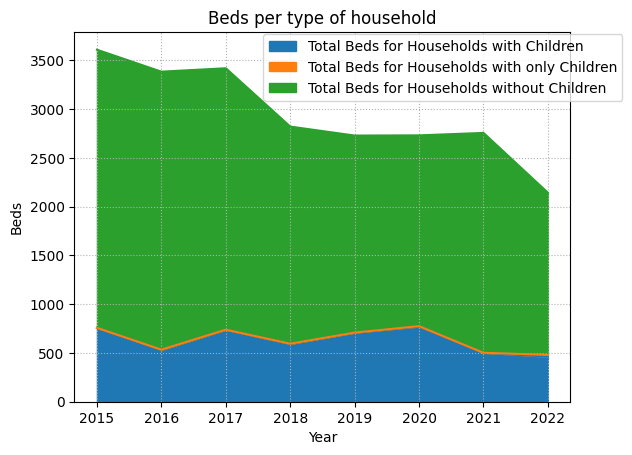

In [16]:
plt.figure(figsize=(10, 6))
to_plot.set_index('Year').iloc[:,:3].plot.area()
plt.title(f'Beds per type of household')
plt.xlabel('Year')
plt.ylabel('Beds')
plt.grid(linestyle='dotted')
plt.legend(bbox_to_anchor=(1.105, .995), loc='upper right', borderaxespad=0)
plt.show()

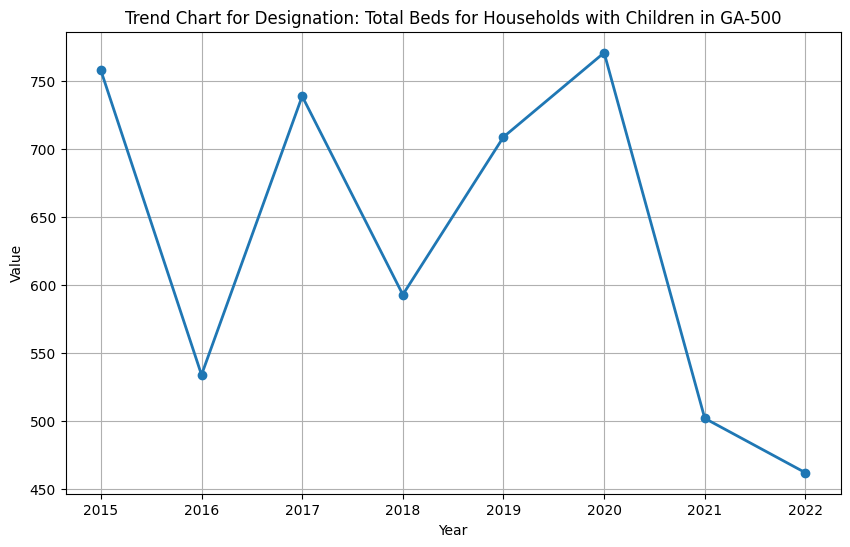

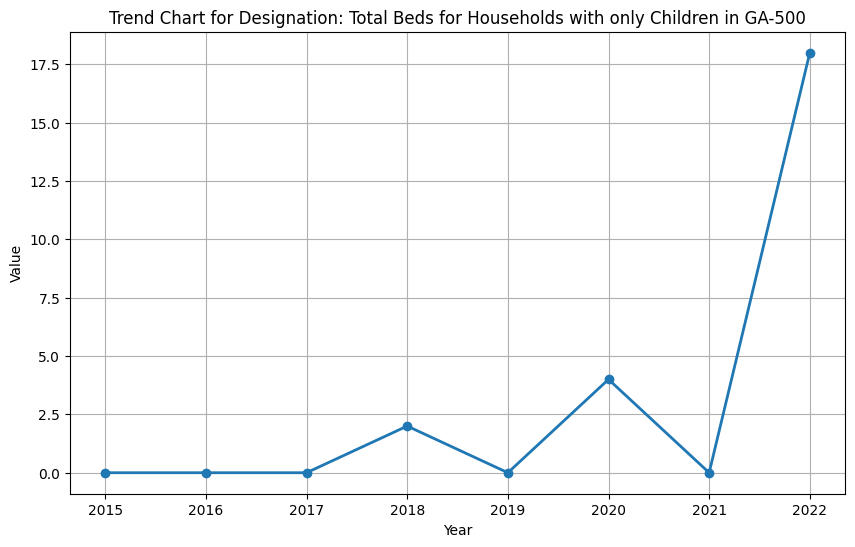

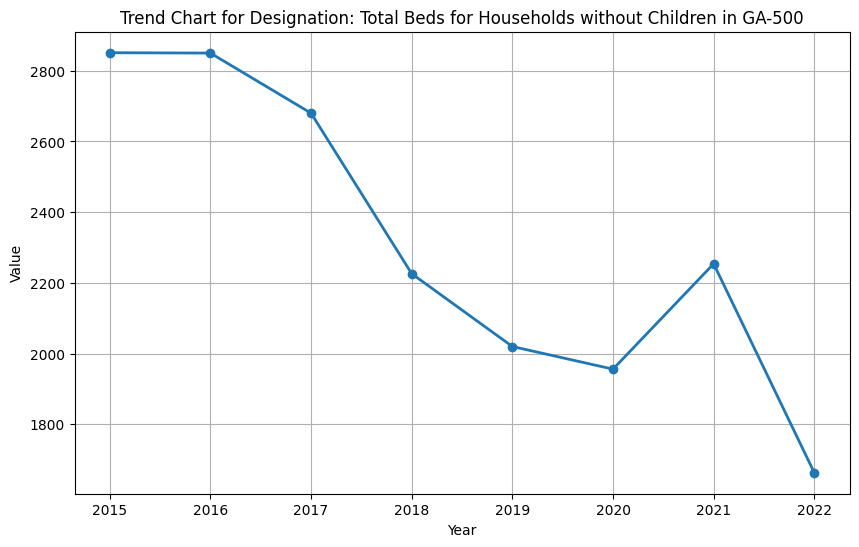

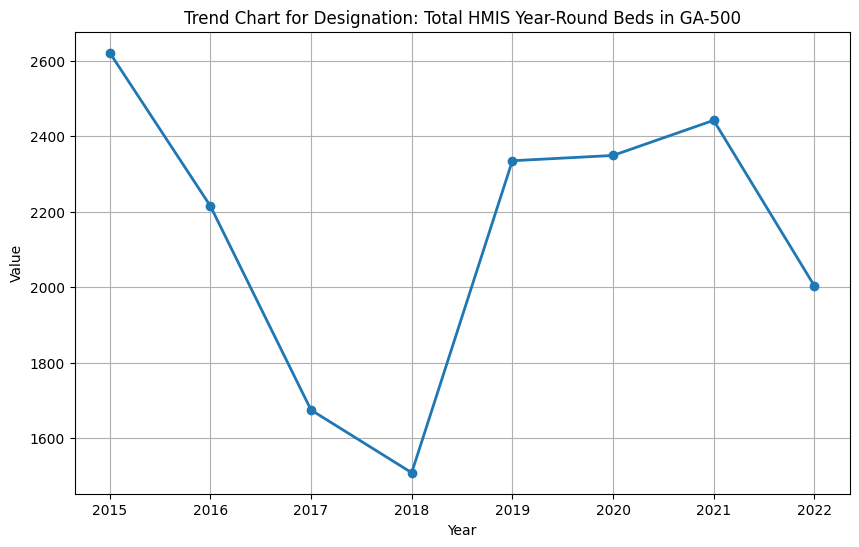

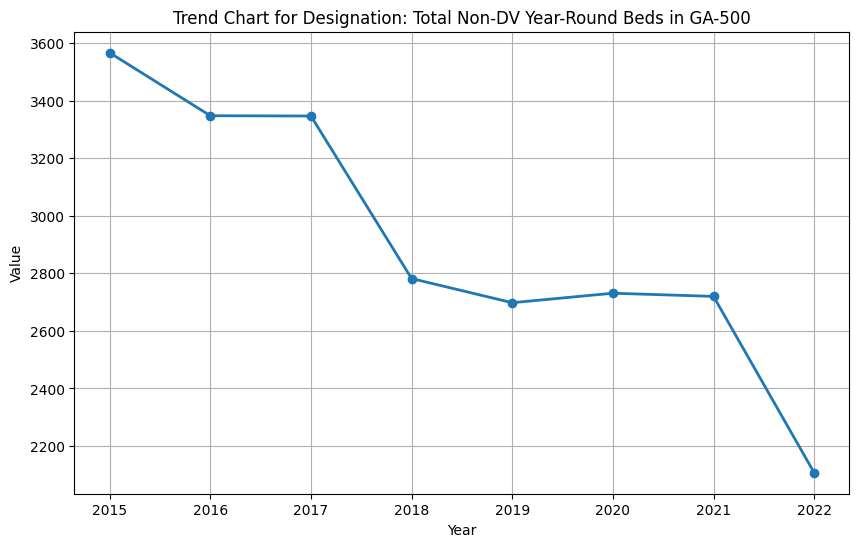

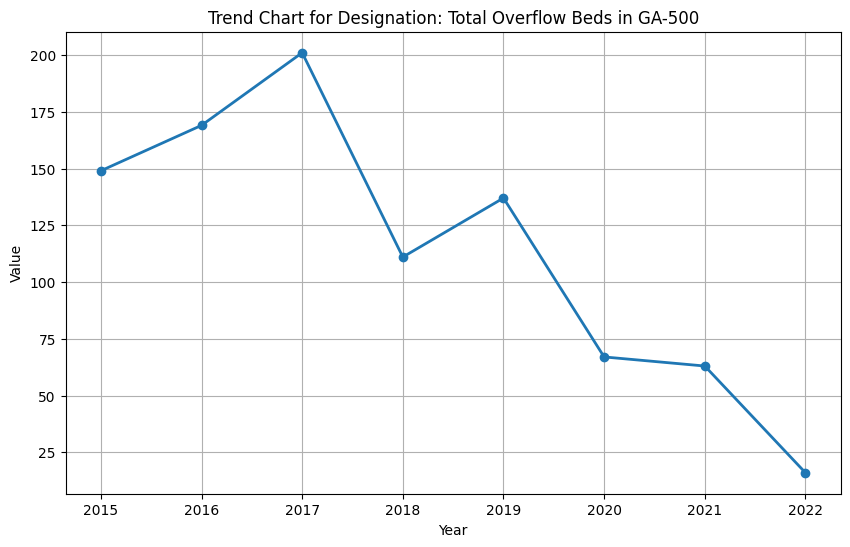

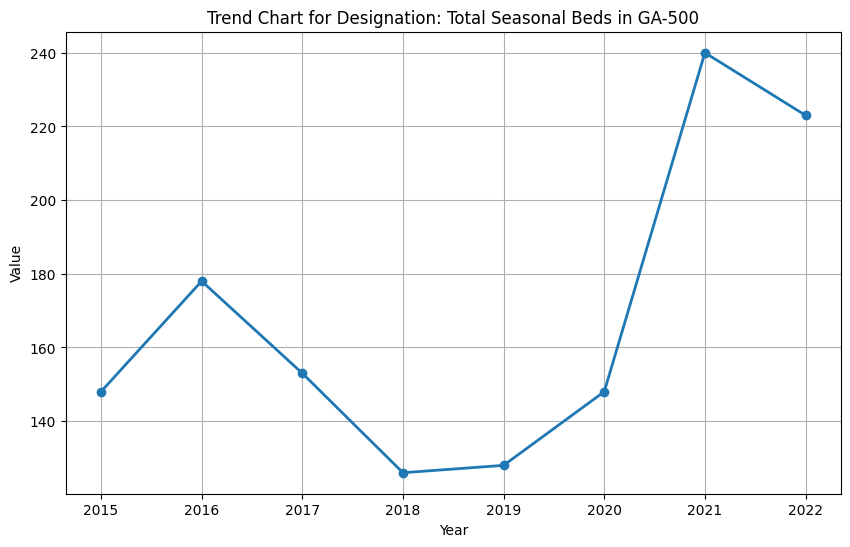

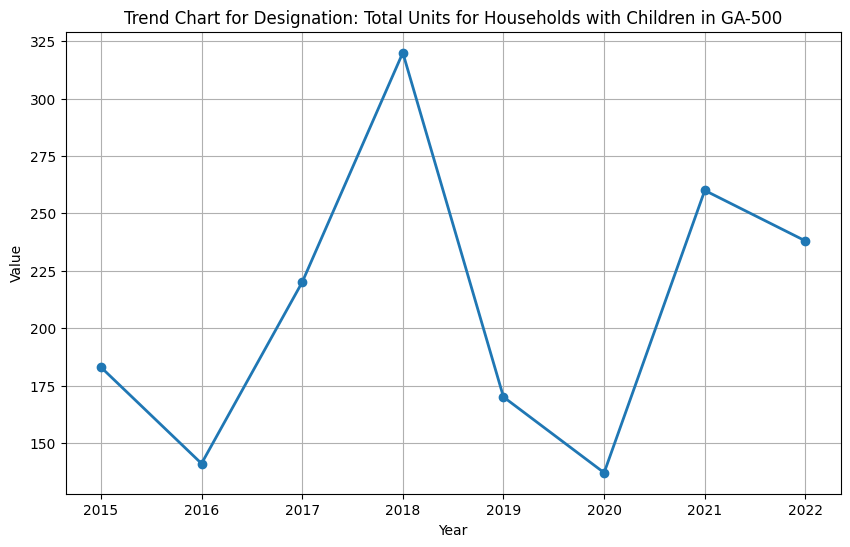

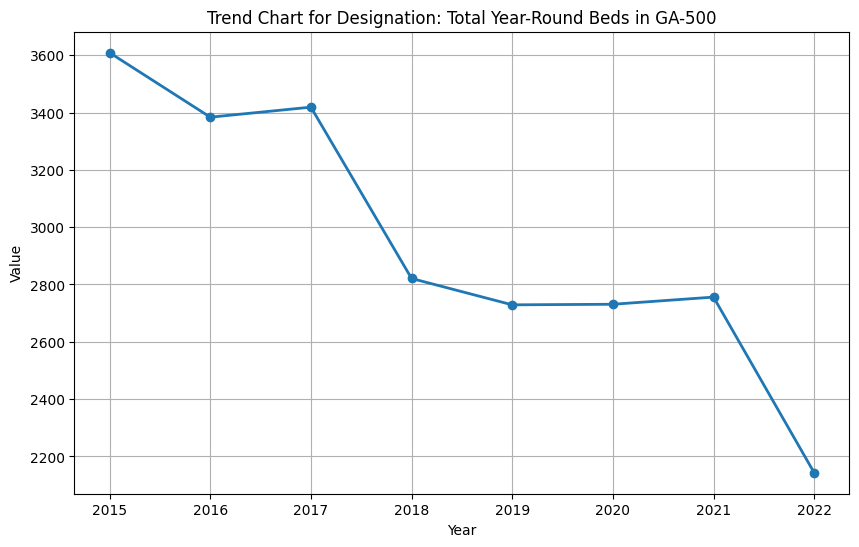

In [17]:
for col in to_plot.columns.to_list()[1:]:
    plt.figure(figsize=(10, 6))
    plt.plot(to_plot['Year'], to_plot[col], marker='o', linestyle='-', linewidth=2)

    plt.title(f'Trend Chart for Designation: {col} in {CoC}')
    plt.xlabel('Year')
    plt.ylabel('Value')
    plt.grid(True)
    plt.show()